In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from tqdm import tqdm

In [5]:
from pathlib import Path

# Chemin racine projet
PROJECT_ROOT = Path.cwd().parent

# Dossier faceforensics (SANS c40 ici)
DATA_DIR = PROJECT_ROOT / "data" / "faceforensics"

# Chemins corrects
ORIGINAL_DIR = DATA_DIR / "original_sequences" / "youtube" / "c40" / "videos"

FAKE_DIRS = {
    "Deepfakes": DATA_DIR / "manipulated_sequences" / "Deepfakes" / "c40" / "videos",
    "Face2Face": DATA_DIR / "manipulated_sequences" / "Face2Face" / "c40" / "videos",
    "FaceSwap": DATA_DIR / "manipulated_sequences" / "FaceSwap" / "c40" / "videos",
    "NeuralTextures": DATA_DIR / "manipulated_sequences" / "NeuralTextures" / "c40" / "videos"
}

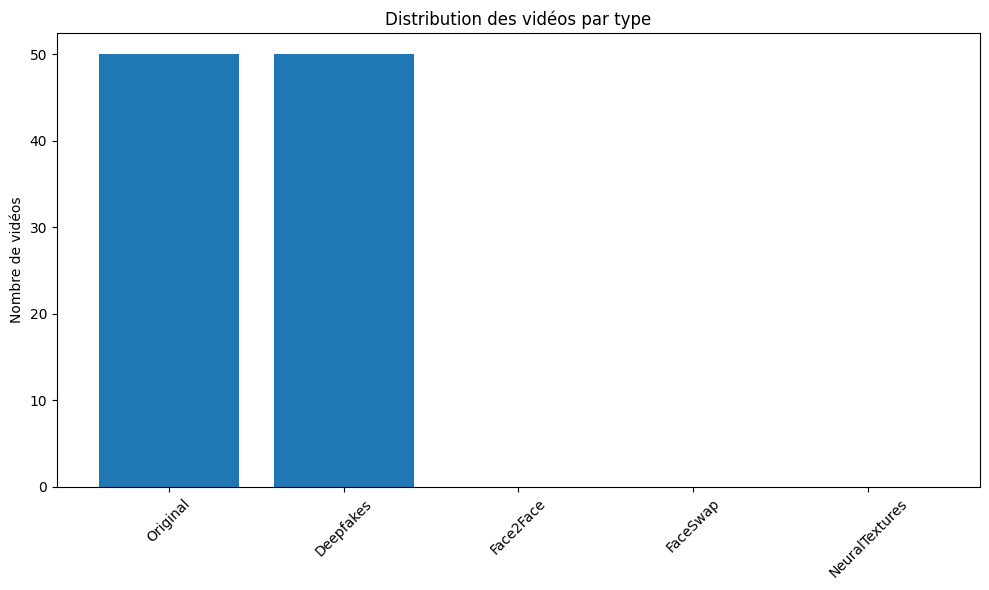


📊 Statistiques du dataset:
                Count
Original           50
Deepfakes          50
Face2Face           0
FaceSwap            0
NeuralTextures      0


In [6]:
def count_videos(directory):
    """Compte le nombre de vidéos .mp4 dans un dossier"""
    if not directory.exists():
        return 0
    return len(list(directory.glob("*.mp4")))

stats = {
    "Original": count_videos(ORIGINAL_DIR)
}
for method, path in FAKE_DIRS.items():
    stats[method] = count_videos(path)

# Visualisation
plt.figure(figsize=(10, 6))
plt.bar(stats.keys(), stats.values())
plt.title("Distribution des vidéos par type")
plt.ylabel("Nombre de vidéos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n📊 Statistiques du dataset:")
print(pd.DataFrame([stats]).T.rename(columns={0: "Count"}))

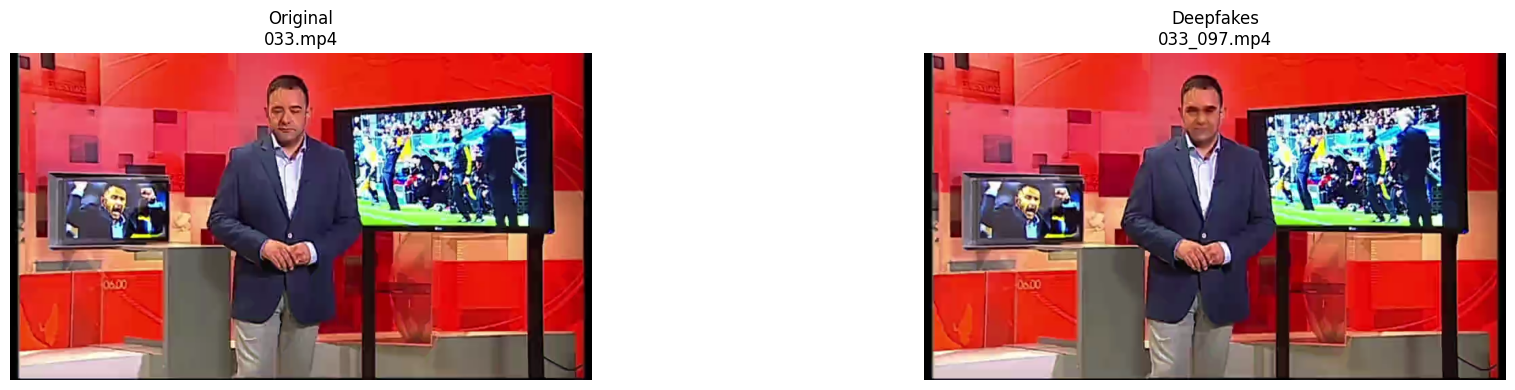

In [7]:
def extract_frame(video_path, frame_number=0):
    """Extrait une frame d'une vidéo"""
    cap = cv2.VideoCapture(str(video_path))
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
    ret, frame = cap.read()
    cap.release()
    if ret:
        return cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    return None

# Sélectionner une vidéo de chaque catégorie
sample_videos = {}
if ORIGINAL_DIR.exists():
    originals = list(ORIGINAL_DIR.glob("*.mp4"))
    if originals:
        sample_videos["Original"] = originals[0]

for method, path in FAKE_DIRS.items():
    if path.exists():
        fakes = list(path.glob("*.mp4"))
        if fakes:
            sample_videos[method] = fakes[0]

# Visualiser
fig, axes = plt.subplots(1, len(sample_videos), figsize=(20, 4))
for i, (method, video_path) in enumerate(sample_videos.items()):
    frame = extract_frame(video_path)
    if frame is not None:
        axes[i].imshow(frame)
        axes[i].set_title(f"{method}\n{video_path.name}")
        axes[i].axis('off')
plt.tight_layout()
plt.show()

In [8]:
def get_video_properties(video_path):
    """Récupère les propriétés d'une vidéo"""
    cap = cv2.VideoCapture(str(video_path))
    props = {
        "fps": cap.get(cv2.CAP_PROP_FPS),
        "frame_count": int(cap.get(cv2.CAP_PROP_FRAME_COUNT)),
        "width": int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
        "height": int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)),
        "duration": cap.get(cv2.CAP_PROP_FRAME_COUNT) / cap.get(cv2.CAP_PROP_FPS)
    }
    cap.release()
    return props

# Analyser quelques vidéos
properties_list = []
for method, video_path in sample_videos.items():
    props = get_video_properties(video_path)
    props["method"] = method
    properties_list.append(props)

df_props = pd.DataFrame(properties_list)
print("\n📹 Propriétés des vidéos:")
print(df_props)


📹 Propriétés des vidéos:
    fps  frame_count  width  height  duration     method
0  25.0          809    854     480     32.36   Original
1  25.0          809    854     480     32.36  Deepfakes


In [ ]:
Analyse et conclusion :
Le dataset actuel est équilibré mais très limité en taille et en diversité.
Les vidéos ont des propriétés homogènes (FPS, durée, résolution), ce qui facilite le prétraitement.

Cependant, plusieurs défis apparaissent :

taille insuffisante pour un entraînement robuste,

absence de diversité de méthodes de manipulation,

compression élevée pouvant masquer certains artefacts,

nécessité d’extraction de frames et de détection de visages pour optimiser l’apprentissage.